In [1]:
import os
import cv2
import numpy as np
import utils as u
from box_detection import box_detection
import matplotlib.pyplot as plt 
from tqdm import tqdm

c:\Users\guilh\OneDrive\Documents\3A\mention\vision\VisualChess\code


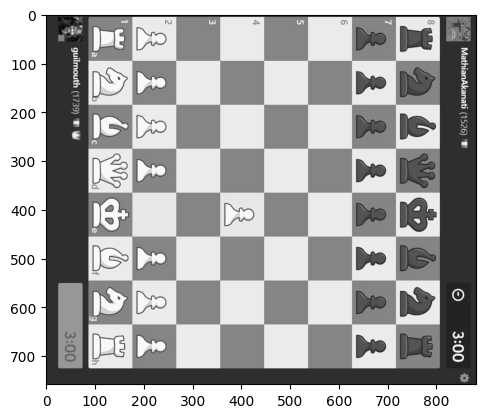

In [2]:
game_images_path = '.././photos_test/chess.com_game/'
path_image_list = sorted(os.listdir(game_images_path), key = lambda x : int(x.split('.')[0]))
move_nb = len(path_image_list)
 
# List d'images représentant les différents boards
move_image_list = [cv2.imread(game_images_path + path, 0) for path in path_image_list] 

plt.imshow(move_image_list[1], cmap = 'gray')
plt.show()


In [3]:
# Paramètres
binary_threshold = 200
use_median = False
hough_lines_threshold = 150

# L'execution de cette cellule peut prendre plusieurs minutes


list_coord_boxes = [] # liste de liste de coordonnées de box
for path in tqdm(path_image_list):
    img_path = game_images_path + path
    list_coord_boxes.append(box_detection(img_path, binary_threshold, use_median, hough_lines_threshold)[1]) 
    
print(len(list_coord_boxes[0]))


100%|██████████| 123/123 [06:20<00:00,  3.10s/it]

64


In [8]:
# Coordonnées des cases de la première photos de la partie
print(list_coord_boxes[0])

{'a1': [(87, 5), (167, 5), (87, 93), (167, 93)], 'a2': [(167, 5), (257, 5), (167, 93), (257, 93)], 'a3': [(257, 5), (347, 5), (257, 93), (347, 93)], 'a4': [(347, 5), (435, 5), (347, 93), (435, 93)], 'a5': [(435, 5), (526, 5), (435, 93), (526, 93)], 'a6': [(526, 5), (616, 5), (526, 93), (616, 93)], 'a7': [(616, 5), (707, 5), (616, 93), (707, 93)], 'a8': [(707, 5), (795, 5), (707, 93), (795, 93)], 'b1': [(87, 93), (167, 93), (87, 183), (167, 183)], 'b2': [(167, 93), (257, 93), (167, 183), (257, 183)], 'b3': [(257, 93), (347, 93), (257, 183), (347, 183)], 'b4': [(347, 93), (435, 93), (347, 183), (435, 183)], 'b5': [(435, 93), (526, 93), (435, 183), (526, 183)], 'b6': [(526, 93), (616, 93), (526, 183), (616, 183)], 'b7': [(616, 93), (707, 93), (616, 183), (707, 183)], 'b8': [(707, 93), (795, 93), (707, 183), (795, 183)], 'c1': [(87, 183), (167, 183), (87, 273), (167, 273)], 'c2': [(167, 183), (257, 183), (167, 273), (257, 273)], 'c3': [(257, 183), (347, 183), (257, 273), (347, 273)], 'c4':

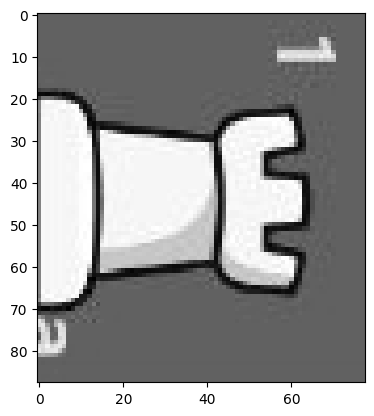

In [9]:
#liste de dimensions move_nb x 64, images des 64 cases pour chaque mouvement
list_square_img = [u.get_all_squares(list_coord_boxes[i], move_image_list[i]) for i in range(move_nb)]
plt.imshow(list_square_img[1][0], cmap='gray')
plt.show()

In [10]:
# Paramètres
threshold_piece_in_square = 7.5
threshold_piece_color = 160

# Liste de arrays représentant chaque position
list_array_move = [u.squares_to_array(list_square, threshold_piece_in_square, threshold_piece_color) for list_square in list_square_img]


In [11]:
# Affiche une nouvelle posiiton
initial_position = u.get_initial_position()
u.get_moves(initial_position, list_array_move[1:])

'1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. d3 b5 6. Bb3 d6 7. Bg5 Be6 8. Nc3 h6 9. Bh4 Be7 10. Ke2 Ng4 11. Bxe7 Qxe7 12. h3 Kd7 13. hxg4 Bxg4 14. Re1 Nd4 15. Kf1 Nxf3 16. gxf3 Bh5 17. Nd5 Qh4 18. Ne3 Qh1 19. Ke2 Bxf3 20. Kd2 Qh3 21. Rh1 Bxh1 22. Qxh1 Qxh1 23. Rxh1 h5 24. Bxf7 h4 25. Ke2 Rf8 26. Bg6 Rf6 27. Bf5 Ke7 28. Nd5 Kf7 29. Nxf6 Kxf6 30. Kf3 g5 31. Kg4 c6 32. Kh3 d5 33. Rg1 Rd8 34. Kg4 dxe4 35. Bxe4 Rh8 36. Bxc6 Rh6 37. Be4 a5 38. Rh1 b4 39. Rh3 Ke7 40. Kf5 Kd6 41. Kxg5 Rh8 42. Rxh4 Rg8 43. Kf6 Rf8 44. Kg7 Rxf2 45. Rh6 Kc5 46. Rc6 Kd4 47. Rc4 Ke3 48. Kg6 Kd2 49. Kg5 Kc1 50. a3 Rxc2 51. Rxc2 Kxc2 52. axb4 axb4 53. Kf5 Kxb2 54. Bd5 Kc3 55. Ke4 b3 56. Bxb3 Kxb3 57. Kxe5 Kc3 58. d4 Kc4 59. d5 Kc5 60. d6 Kc6 61. Ke6 Kb7 '